# 06. 조합 슬롯머신
- **컨텍스트 기반 슬롯머신 문제 : 조합 구조를 가진 솔루션의 경우에 해당**
    - 각 선택지가 어떤 속성의 조합, 즉 특성량(Feature) 에 따라 나타나며, 그 특징이 어떤 법칙에 따라 보상 기댓값을 결정하고 있다고 생각할 수 있음
    - 속성과 보상 기댓값 사이의 모델을 고려함으로써, 웹최적화의 컨텍스트에서는 디자인안을 표시할 때 변화하는 사용자의 특징을 고려한 탐색이 가능
    
<br>

#### 마케팅 케이스
- 카메라 랜딩 페이지 최적화에서 4개 디자인안 중에서 클릭률이 가장 높은 디자인안을 탐색
- **각 솔루션을 더미변수로 나타냄으로 인하여,** 
    
    **각 디자인안은 이미지를 나타내는 변수 $x_1$과 CTA버튼을 나타내는 $x_2$의 조합으로 표현되며**

$$x = \begin{pmatrix} x_1 \\ x_2\end{pmatrix}$$**4개의 디자인안은 각각**


$$x_A= \begin{pmatrix} 0 \\ 0\end{pmatrix},\;x_B =\begin{pmatrix} 0 \\ 1\end{pmatrix},\;x_C \begin{pmatrix} 1 \\ 0\end{pmatrix},\;x_D \begin{pmatrix} 1 \\ 1\end{pmatrix}$$

<br>

- **각 디자인안 $x$는 각각 고유의 클릭률 (보상)$\theta_x$를 가지고 있다고 가정**

    **어떤 디자인안을 사용자에게 표시하면, 그 클릭률을 파라미터로 가진 베르누이 분포로부터 클릭(보상) $r$이 생성**
    
$$r \sim p(r|\theta_x) = Bernoulli(\theta_x)$$

<br>

## 06.01. 선형 모델과 일반화 선형 모델

- 아래 모델들은 솔루션 $x$를 구성하는 각 요소 $x_1, x_2$와 클릭률 $\theta$사이의 관계성을 가정


$$\text{모델1 : } \theta_x = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

$$\text{모델2 : } \theta_x = logistic(\beta_0 + \beta_1 x_1 + \beta_2 x_2)$$

$$\text{모델3 : } \theta_x = logistic(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2)$$

- 이 모델들은 벡터의 내적을 이용하여 아래와 같이 표현

$$\theta_x = \phi(x)^T w\;\;\; \phi(x) = (1, x_1, x_2)^T.\;\;\; w = (\beta_0, \beta_1, \beta_2)^T$$

$$\theta_x = logistic(\phi(x)^T w)\;\;\; \phi(x) = (1, x_1, x_2)^T.\;\;\; w = (\beta_0, \beta_1, \beta_2)^T$$

$$\theta_x = logistic(\phi(x)^T w)\;\;\; \phi(x) = (1, x_1, x_2, x_1 x_2)^T.\;\;\; w = (\beta_0, \beta_1, \beta_2, \beta_3 )^T$$

<br>

- $\phi(x)$는 솔루션 $x$의 요소를 곱하거나 새로운 수치를 더한 벡터 $\rightarrow$ 솔루션을 구성하는 요소에 어떠한 조작을 추가한 **특성 벡터 (Feature Vector)**
    

<br>

#### 모델에 대한 일반화

- **모델1 :  같이 관심 변수 $\theta_x$를 특성과 파라미터의 내적 $\phi(x)^T w$로 나타내는 모델** 
    
    **$\rightarrow$ 선형 모델 (Linear Model)**

<br>

- **모델2, 3 :  같이 관심 변수 $\theta_x$를 특성과 파라미터의 내적 $\phi(x)^T w$을, 어떠한 함수로 감싼 모델** 
    
    **$\rightarrow$ 일반화 선형 모델 (Generalized Linear Model)**
    
    <br>
    
    - 모델2, 3은 로짓함수를 이용하여 $logit(\theta_x) = \phi(x)^T w$로 표현
    
    - 모델2, 3에 우변에 해당하는 특성과 파라미터의 내적 $\rightarrow$ **선형 예측치 (Linear Predictor)**
    
    - 로짓함수와 같이, 선형 예측치와 관심변수 $\theta_k$를 연결하는 함수 $\rightarrow$ **연결함수 (Link Function)**
    


<br>

- **$\phi(x)^T$오 $w$의 내적을 연결함수의 역함수로 감싼 것 $link^{-1} (\phi(x)^T w)$를 계산함으로써, 보상 기댓값 (클릭률) $\theta_k$를 결정**
    
    $\rightarrow$ **클릭율을 매개변수로 가진 베르누이 분포  $p(r|\theta_k) = Bernoulli(\theta_x)$로부터 보상 $r$이 생성**
    
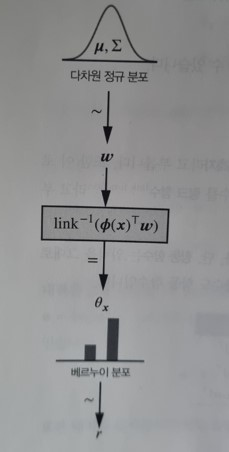

$$w \sim N(\mu_0, \Sigma_0)$$

$$\theta_x = link^{-1} (\phi(x)^T w)$$

$$r \sim Bernoulli(\theta_x)$$

<br>

## 06.02. MCMC를 슬롯머신에 사용

<br>

### 컨텍스트 기반 슬롯머신
- 각 선택지를 독립된 솔루션이 아니라, 어떤 특징의 조합으로 다루는 슬롯머신 문제의 정식화

<br>

- **에이전트는 각 시점 $t$에서 선택할 수 있는 솔루션의 집합 $X(t) = \{ x_{1, t}, \dots , x_{K(t), t}\}$에서 하나의 솔루션을 선택**
    
    ($x(t)$ = $t$시점에 선택된 솔루션, $K(t)$ = $t$시점에 선택할 수 있는 솔루션의 전체 수)

<br>

- **각 솔루션은 고유의 보상 기댓값 $\theta_k$를 가지며, 선택이 되면 그 기댓값에 따라 보상 $r(t) \sim p(r|\theta_{x(t)})$를 생성**
    
    **이때 어떤 예산 $T$안에서 얻은 누적 보상 $R(T) = \sum^T_{t=1} r(t)$를 최대로 하는 방책을 구하는 것이 해결해야할 문제**
    
<br>

- 다중 슬롯머신 문제에서는 각 솔루션을 독립적으로 생각하기 때문에, 각가을 선택한 횟수와 그에 대응하는 보상의 표본평균을 기록한 테이블을 준비하는 것만으로 충분히 유용한 알고리즘을 구성할 수 있음 ($\epsilon$-greedy, UCB에서의 `self.counts`, `self.values`가 해당)
    
    **그러나 컨텍스트 기반 슬롯머신 문제에서는 솔루션이 가진 특성의 조합이 다양하기에, 각 솔루션이 가진 특징 $\phi(x)$와 보상 기댓값 $\theta_x$사이의 관계를 가정하는 접근방식이 (모델 베이스) 사용**

<br>

### MCMC를 이용한 로지스틱 회귀 톰슨 샘플링
- 톰슨 샘플링은 보상 기댓값의 사후분포만 알면, 해당 분포로부터 샘플을 생성하는 것만으로 알고리즘 구현이 가능하기에 실용성이 높음
- 톰슨 샘플링에 회귀모델을 적용

<br>

#### 절차
1. 시점 $t=1$ 초기화
2. 시점 $t$에서 선택할 수 있는 솔루션 $x_{i, t} \in X(t)$에 대해 다음을 반복
    
    - 시점 $t-1$까지의 이력 $D(t-1)$로부터 솔루션 $x_{i,t}$의 보상 기댓값의 사후분포 $p(\theta_{x_{i, t}} | D(t-1))$을 추론
    - 보상 기댓값의 샘플 $\theta_{x_{i, t}} \sim p(\theta_{x_{i, t}})$을 생성

3. 보상 기댓값의 샘플값이 가장 큰 솔루션 $\hat{x^*} = arg max_{x_{i, t \in X(t)} }\hat{\theta_{x_{i, t}}}$를 선택하고, 환경으로부터 보상 $r(t)$를 얻음
4. 보상 $r(t)$에 기반해 이력을 업데이트하고 $D(t)$라고 정의
5. $t=T$이면 종료, 그렇지 않으면 2로 돌아가 반복

<br>

- 컨텍스트 기반 슬롯머신 문제에서도 보상 기댓값 샘플이 최대가 되는 솔루션을 선택한다는 톰슨 샘플링의 기본적인 방침은 변하지 않음
- 보상 기댓값의 사후분포 $p(\theta_{x_{i, t}} | D(t-1))$을 로지스틱 회귀모델을 이요해 추론하는 것

<br>



In [2]:
import numpy as np
import pymc3 as pm

- 선택 가능한 솔루션의 집합 $X(t)$

In [21]:
arms = [[0, 0], [0, 1], [1, 0], [1, 1]]

<br>

#### 에이전트 구현
- `self.phis` : $\phi(x) = (1, x_1, x_2)^T$
- `get_arm` : **MCMC를 실행하여, 각 솔루션의 보상 기댓값 `theta`를 추론하고, 사후분포로부터 샘플이 최대가 되는 솔루션을 출력**
    - **한번도 시도한적이 없는 솔루션이 있는 경우에는, 그 솔루션을 우선출력**
    
<br>

- `w` : $w = (\beta_0, \beta_1, \beta_2)$ $\rightarrow$ 3개의 매개변수에 대하여 $N(0, 10^2)$ 사전분포를 가정
- `linpred` : $\phi(x)^T w$
- `theta` : $logistic (\phi(x)^T w)$

In [24]:
class MCMC_GLMTSAgent(object): 
    
    def __init__(self):
        self.counts = [0 for _ in arms]
        self.wins = [0 for _ in arms]
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T

    def get_arm(self):
        if 0 in self.counts: return self.counts.index(0) 
        with pm.Model() as model:
            w = pm.Normal('w', mu=0, sigma=10, shape=3) 
            linpred = pm.math.dot(w, self.phis)
            theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-linpred)))
            obs = pm.Binomial('obs', n=self.counts, p=theta, observed=self.wins)
            trace = pm.sample(2000, chains=1)
        
        # 사후분포에서 각 솔루션의 보상 기댓값 theta를 하나만 샘플링
        sample = pm.sample_posterior_predictive(trace, samples=1, model=model, var_names=['theta'])
        
        # 샘플값이 가장 크게 되는 솔루션의 인덱스를 반환
        return np.argmax(sample['theta'])

    def sample(self, arm_index, reward): 
        self.counts[arm_index] += 1 
        self.wins[arm_index] += reward

<br>

#### 환경 구현
- 솔루션 $x = (x_1, x_2)^T$이 선택되었을 때, 
    
    실제 보상 기댓값 $\theta_x= logistic(0.2x_1 + 0.8 x_2 -4)$를 가진 베르누이 분포에 따라 보상이 주어지는 것으로 가정

In [25]:
class Env(object):
    
    def p(arm):
        x = arm[0] * 0.2 + arm[1] * 0.8 - 4 
        p = 1 / (1 + np.exp(-x))
        return p

    def react(arm):
        return 1 if np.random.random() < Env.p(arm) else 0

    def opt():
        return np.argmax([Env.p(arm) for arm in arms])

In [ ]:
np.random.seed(0)
selected_arms = []
earned_rewards = []
n_step = 20
agent = MCMC_GLMTSAgent() 

In [ ]:
for step in range(n_step):
    arm_index = agent.get_arm() 
    
    for _ in range(50):
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms.append(arm_index)
        earned_rewards.append(reward)

<br>

#### 조합에 따른 실제 보상 기댓값과, 시뮬레이션 솔루션 선택 횟수 비교
- 에이전트가 기댓값이 높은 솔루션 $x_4$를 우선으로 선택하는 형태

In [27]:
from matplotlib import pyplot as plt 
from collections import Counter

In [ ]:
arm_count = [row[1] for row in sorted(Counter(selected_arms).items())] 

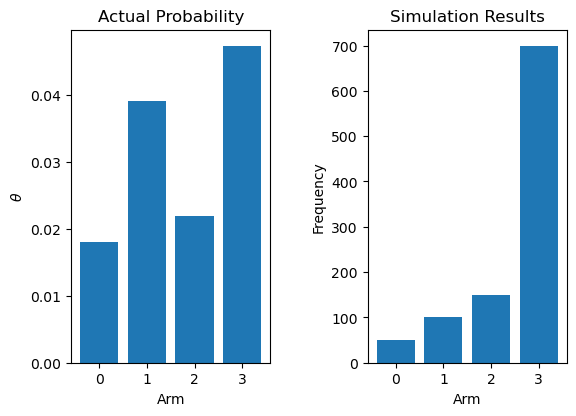

In [28]:
plt.subplot(1, 2, 1)
plt.bar(range(4), [Env.p(arm) for arm in arms], tick_label=range(4)) 
plt.xlabel('Arm')
plt.ylabel(r'$\theta$')
plt.title('Actual Probability')

plt.subplot(1, 2, 2)
plt.bar(range(4), arm_count, tick_label=range(4))
plt.xlabel('Arm')
plt.ylabel('Frequency')
plt.title('Simulation Results')
plt.tight_layout(pad=3)
plt.show() 

<br>

## 06.03. 베이즈 선형회귀

- **관측값을 생성하는 분포가 정규분포를 따르며 (정규 가능도) 그 기댓값이 매개변수와 특성의 내적만으로 나타나는 모델**
    
    $\rightarrow$ **선형 회귀 모델의 매개변수 $w$의 사후분포를 베이즈 추론으로 계산** 

$$w \sim p(w) = N(\mu, \Sigma)$$

$$\theta = \phi(x)^T w$$

$$r \sim p(r|\theta, \sigma^2) = N(\theta, \sigma^2)$$

<br>

- 보상 $r$은 평균 $\theta$, 분산 $\sigma^2$의 정규분포를 따른다고 가정
    
    $\rightarrow$ **정규 가능도**
    
$$p(r|w) = N(\theta|\sigma^2) = N(\phi(x)^T w, \sigma^2)$$

<br>

- 어떤 시점 $t$까지 에이전트가 솔루션 $x_1, \dots x_t$를 제시하고, 그것에 대해 보상 $r_1, \dots r_t$를 얻었을 떄 $D(t)$는

$$D(t) = [(x_1, r_1), \dots, (x_t, r_t)]$$

- 이력 $D(t)$에 관해 베이즈 추론을 반복했을 때의 가능도 함수는 

$$p(D(t)|w) = \Pi^t_{r=1} N(\phi(x_r)^T w, \sigma^2)$$

<br>

### 다차원 정규분포와 사전분포
- 다차원 정규분포 : 1차원 정규분포를 다차원으로 확장한 것

<br>

- 다차원 정규분포는 평균벡터 $\mu$와 분산공분산행렬 $\Sigma$를 파라미터로 가지는 연속확률분포
    - 어떤 $n$차원 확률변수벡터 $x$가 다차원 정규분포를 따를 때, 그 확률밀도함수는 
    
$$p(x|\mu, \Sigma) = \frac{1}{(2\pi)^{n/2} \sqrt{|\Sigma|}} exp(-\frac{1}{2} (x-\mu)^T \Sigma^{-1}(x-\mu))$$**이 때의 평균은 $n$차원 벡터, 분산공분산행렬 $\Sigma$는 $n\times n$의 대칭행렬**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/800px-MultivariateNormal.png' width='600'>

- 확률변수 $x$와 $y$의 2차원 분산공분산행렬은 

$$\Sigma = \begin{pmatrix}\sigma^2_x \sigma_{xy} \\ \sigma_{xy} \sigma^2_y\end{pmatrix}$$

$$\sigma^2_x : x의 분산 / \sigma^2_y : y의분산  / \sigma_{xy} : x와 y의 공분산$$

<br>

#### 상관관계
- 공분산이 양의 값을 가질 때 $\rightarrow$ 양의 상관관계
- 공분산이 음의 값을 가질 때 $\rightarrow$ 음의 상관관계

<br>

- **상관관계의 강도를 나타내는 상관계수 $\rho$**
    - 상관계수는 [-1, 1]의 범위를 가짐
    - -1은 강한 음의 상관관계 / 0은 상관관계 없음 / 1은 강한 양의 상관관계

$$\rho = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$


<br>

### 베이즈 정리
- 이력 $D(t)$를 관측한 뒤의 $w$의 사후분포
    - $m$은 특성 $\phi(x)$의 차원수 (=파라미터 $w$의 차원수)
    
$$p(w|D(t)) \propto p(w) p(D(t)|w) $$

$$\propto N(\mu_0, \Sigma_0) \Pi^t_{r=1} N(\phi(x_r) w, \sigma^2)$$

$$\propto \frac{1}{(2\pi)^{,/2}\sqrt{|\Sigma_0|}} exp(-\frac{1}{2}(w-\mu_0)^T \Sigma^{-1}_0 (w-\mu_0)) \times \Pi^t_{r=1}\frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{1}{2\sigma^2} (r_r - \phi(x_r)^T w)^2)$$

$$\propto exp(-\frac{1}{2} (w-\mu_0)^T \Sigma^{-1}_0 (w-\mu_0) - \frac{1}{2\sigma^2} \sum^t_{r=1} (r_r - \phi(x_r)^T w)^2)$$

$$\propto exp(-\frac{1}{2} (w-\mu_0)^T \Sigma^{-1}_0 (w-\mu_0) -\frac{1}{2\sigma^2} (r-\Phi w)^T (r- \Phi w))$$

$$\propto exp(-\frac{1}{2} w^T (\Sigma^{-1}_0 + \frac{1}{\sigma^2} \Phi^T \Phi)w + w^T (\Sigma^{-1}_0 \mu_0 + \frac{1}{\sigma^2} \Phi^T r))$$

$$\text{(단, } A = \Sigma^{-1}_0 + \frac{1}{\sigma^2} \Phi^T \Phi,\; b= \Sigma^{-1}_0 \mu_0+\frac{1}{\sigma^2}\Phi^T r\text{로 한다)}$$

$$\propto exp(-\frac{1}{2}(w-A^{-1}b)^T A(w-A^{-1}b))$$

$$(\Phi = \begin{pmatrix} \phi^T (x_1) \\ \vdots \\ \phi^T (x_t)\end{pmatrix} \text{(Design Matix)})$$ 

<br>

#### $\rightarrow$ $w$의 사후분포는 $N(w|\mu \Sigma) \propto exp(-\frac{1}{2} (w-\mu)^T \Sigma^{-1} (w-\mu))$
**$\rightarrow$ 다차원 정규분포**

**$\rightarrow$ 그 평균 $\mu_t$와 분산 $\Sigma_t$**

$$\mu_t = A^{-1}_t b_t$$

$$\Sigma_t = A^{-1}_t$$

$$A_t = \Sigma^{-1}_0 + \frac{1}{\sigma^2}\Phi^T \Phi$$

$$b_t = \Sigma^{-1}_0\mu_0 + \frac{1}{\sigma^2}\Phi^T r$$

<br>

### 업데이트
- 슬롯머신 알고리즘의 프레임에서는 한 데이터가 주어졌을 때 파라미터를 업데이트해 탐색에 도움을 주는 것이 바람직
- 시점 $t+1$에서의 데이터 $(x_{t+1}, r_{t+1})$가 추가되었을 때, 베이즈 업데이트
    
    $\rightarrow$ 즉 시점 $t$까지의 데이터로 추론된 평균 $\mu_t$와 분산 $\Sigma_t$를 사전분ㄹ포로 하여 새로운 사후분포 $\mu_{t+1}$과 분산 $\Sigma_{t+1}$을 계산

<br>

- 시점 $t+1$에서의 사후분포 파라미터 $\mu_{t+1}$과 분산 $\Sigma_{t+1}$ 

$$\mu_{t+1} = A^{-1}_{t+1} b_{t+1}$$

$$\Sigma_{t+1} = A^{-1}_{t+1}$$

$$A_{t+1} = \Sigma^{-1}_t + \frac{1}{\sigma^2} \phi(x_{t+1}) \phi(x_{t+1})^T$$

$$b_{t+1} = \Sigma^{-1}_t \mu_t + \frac{1}{\sigma^2} \phi(x_{t+1})r_{t+1}$$

<br>

### 새로운 입력에 대한 예측

- 파라미터 $w$의 사후분포 추론을 통하여, 어떤 솔루션 $x_*$에 대하여 보상 기댓값 $\theta_*$의 사후분포 $p(\theta_* | x_*)$도 계산 가능
- 분포의 기댓값 $E[\theta_* | x_*]$

$$E[\theta_*|x_*] = E[\phi(x_*)^T w]$$

$$\propto \phi(x_*)^T E[w]$$

$$\propto \phi(x_*)^T \mu_t$$


<br>

- 보상 기댓값의 사후분포 분산 $V[\theta_* | x_*]$
    
    $V[x] = E[(x-E[x])(x-E[x])^T]$이기에
    
$$V[\theta_* | x_*] = E[(\phi(x_*)^T w - \phi(x_*)^T \mu_t))(\phi(x_*)^T w - \phi(x_*)^T \mu_t)^T]$$

$$=E[(\phi(x_*)^T (w-\mu_t))(\phi(x_*)^T (w-\mu_t))^T]$$

$$=E[\phi(x_*)^T (w-\mu_t) (w-\mu_t)^T \phi(x_*)]$$

$$=\phi(x_*)^T E[(w-\mu_t)(w-\mu_t)^T]\phi(x_*)$$

$$= \phi(x_*)^T V[w|\phi(x_*)]$$

$$= \phi(x_*)^T \Sigma_t \phi(x_*)$$

<br>

#### 새로운 입력 $x_*$에 대한 보상 기댓값 $\theta_*$는 정규분포를 따름

$$\theta_* \sim N(\phi(x_*)^T \mu_t, \phi(x_*)^T \Sigma_t \phi(x_*))$$

<br>

#### 새로운 입력 $x_*$에 대한 $r_*$의 분포 $p(r_*|x_*)$ (예측분포)
- 보상 $r_*$는 기댓값 $\theta_*$의 정규분포를 따르므로, 기댓값은 $\theta_*$이며, 
    
    분산은 데이터 생성에 따르는 산포 $\sigma^2$가 더해져 $\sigma^2 + \phi(x_*)^T \Sigma_t \phi(x_*)$
    
    
$$r_* \sim N(\phi(x_*)^T \mu_t, \sigma^2+\phi(x_*)^T \Sigma_t \phi(x_*))$$

<br>

## 06.04. LinUCB 알고리즘
- **UCB 알고리즘은 각 선택지를 선택한 횟수와 보상의 표본평균으로부터, UCB값을 도출하고 활용과 탐색의 균형을 얻는 탐색을 실현하는 알고리즘**
    - 기본적으로는 보상의 표본평균이 높은 선택지를 취하면서도 탐색하지 않은 솔루션에 대해서는 확실하지 않은 '보너스'를 추가하면서,
            
        아직 충분히 평가하지 않은 선택지에도 시행 횟수를 할당할 수 있음
        
<br>

- **선형모델을 이용하여, 어떤 선택지 $x_*$에 대한 보상 기댓값 $\theta_*$의 기댓값 $E[\theta_*|x_*]$와 분산 $V[\theta_*|x_*]$을 추론할 수 있기에,**
    
    **기댓값이 나타내는 '유망함'에 분산이 나타내는 '불확실함'을 추가하면, 선형회귀모델 UCB (LinUCB)알고리즘**
    
<br>

- **LinUCB 알고리즘은 UCB값이 최대가 되는 솔루션을 순차적으로 선택**
    
    $\rightarrow$ **보상 기댓값의 기댓값 $E[\theta_* |x_*]$을 상수 ($\alpha>0$)배한, 보상 기댓값의 표준편차 $\sqrt{V[\theta_* |x_*]}$를 더한 값으로 각 선택지의 유망함과 불확실함을 더한 것**
    
$$UCB_{x_{*}} (t) = E[\theta_* | x_*] + \alpha \sqrt{V[\theta_* |x_*]}$$

$$= \phi(x_*)^T \mu_t + \alpha \sqrt{\phi(x_*)^T \Sigma_t \phi(x_*)}$$

<br>

- `self.alpha` : UCB 값을 구할 때 표준편차에 곱할 상수 $\alpha$
- `self.sigma` : 관측된 보상의 산포 $\sigma^2$
- `self.A`, `self.B` : 가중치 $w$를 계산할 때 순차적으로 갱신할 숫자 $A$, $b$
    - $A$의 초깃값은 $I$ (단위행렬), $b$의 초깃값은 0 (영행렬)
    

In [29]:
class LinUCBAgent(object):
    
    def __init__(self):
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T 
        self.alpha = 1
        self.sigma = 1
        self.A = np.identity(self.phis.shape[0])
        self.b = np.zeros((self.phis.shape[0], 1))
    
    # 파라미터 w의 평균과 분산을 계산
    def get_arm(self):
        inv_A = np.linalg.inv(self.A)
        mu = inv_A.dot(self.b)
        S = inv_A
        pred_mean = self.phis.T.dot(mu)
        pred_var = self.phis.T.dot(S).dot(self.phis)
        ucb = pred_mean.T + self.alpha * np.sqrt(np.diag(pred_var)) 
        
        return np.argmax(ucb)

    def sample(self, arm_index, reward):
        phi = self.phis[:, [arm_index]]
        self.b = self.b + phi * reward / (self.sigma ** 2)
        self.A = self.A + phi.dot(phi.T) / (self.sigma ** 2)

In [31]:
n_iter = 500
n_step = 5000
selected_arms = np.zeros((n_iter, n_step), dtype=int) 
earned_rewards = np.zeros((n_iter, n_step), dtype=int) 

In [32]:
for it in range(n_iter):
    agent = LinUCBAgent()
    
    for step in range(n_step):
        arm_index = agent.get_arm()
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms[it, step] = arm_index
        earned_rewards[it, step] = reward

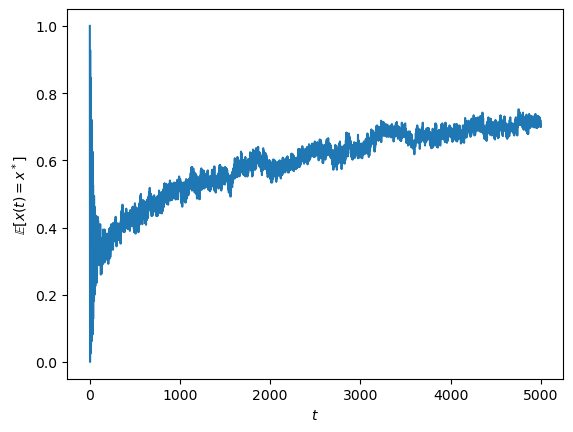

In [33]:
plt.plot(np.mean(selected_arms==Env.opt(), axis=0))
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.show() 

<br>

### 역행렬 계산을 피하기
- 다루어야 할 특성의 차원이 높아지면 행렬 $A$의 크기도 증가
    
    $\rightarrow$ $A^{-1}$을 구하는 것이 계산과정의 속도를 낮춤
    
<br>

#### 우드버리 공식 (Woodbury Formula)

$$(A+BDC)^{-1} = A^{-1} - A^{-1} B(D^{-1} + CA^{-1} B)^{-1} C A^{-1}$$

<br>

$\rightarrow$ **$A = A_t$, $B = \phi(x_{t+1})$, $C = \phi(x_{t+1})$, $D = \sigma^{-2}$을 대입하면**

$$\text{좌변 = }(A_t + \sigma^{-2} \phi(x_{t+1}) \phi(x_{t+1})^T)^{-1} = A^{-1}_{t+1} \\ \text{우변 = }A^{-1}_t - A^{-1}_t \phi(x_{t+1})(\sigma^2 + \phi(x_{t+1})^T A^{-1}_t \phi(x_{t+1}))^{-1} \phi(x_{t+1})^T A^{-1} \\ = A^{-1} - \frac{A^{-1}_t \phi(x_{t+1}) \phi(x_{t+1})^T A^{-1}_t}{\sigma^2 + \phi(x_{t+1})^T A^{-1}_t \phi(x_{t+1})}$$

**따라서 $A^{-1}_{t+1}$의 갱신된 식은**

<br>

$$A^{-1}_{t+1} = A^{-1} - \frac{A^{-1}_t \phi(x_{t+1}) \phi(x_{t+1})^T A^{-1}_t}{\sigma^2 + \phi(x_{t+1})^T A^{-1}_t \phi(x_{t+1})}$$

**이며, 가중치 $w$의 평균 $\mu_{t+1}$ 및 분산 $\Sigma_{t+1}$을 구하기 위해 필요한 것은 $A^{-1}_{t+1}$뿐이므로 $A_{t+1}$을 구할 필요 없음**

<br>

- 우드버리 공식을 적용한 LinUCB 에이전트

In [46]:
class LinUCBAgent2(object): 
    def __init__(self):
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T 
        self.alpha = 1
        self.sigma = 1
        self.inv_A = np.identity(self.phis.shape[0])
        self.b = np.zeros((self.phis.shape[0], 1))

    def get_arm(self):
        post_mean = self.inv_A.dot(self.b)
        post_var = self.inv_A
        pred_mean = self.phis.T.dot(post_mean)
        pred_var = self.phis.T.dot(post_var).dot(self.phis)
        ucb = pred_mean.T + self.alpha * np.sqrt(np.diag(pred_var)) 
        return np.argmax(ucb)

    def sample(self, arm_index, reward):
        phi = self.phis[:, [arm_index]]
        iAppTiA = self.inv_A.dot(phi).dot(phi.T).dot(self.inv_A) 
        s2_pTiAp = self.sigma ** 2 + phi.T.dot(self.inv_A).dot(phi) 
        self.inv_A = self.inv_A - iAppTiA / s2_pTiAp
        self.b = self.b + (self.sigma ** 2) * reward * phi

<br>

### 일반 UCB와의 성능 비교

In [47]:
class UCBAgent(object):

    def __init__(self):
        self.counts = [0 for _ in range(n_arms)] 
        self.values = [0 for _ in range(n_arms)]

    def calc_ucb(self, arm):
        ucb = self.values[arm]
        ucb += np.sqrt(np.log(sum(self.counts)) / (2 * self.counts[arm]))
        
        return ucb

    def get_arm(self):
        if 0 in self.counts:
            arm = self.counts.index(0) 
            
        else:
            ucb = [self.calc_ucb(arm) for arm in range(n_arms)]
            arm = ucb.index(max(ucb)) 
        
        return arm

    def sample(self, arm, reward): 
        self.counts[arm] = self.counts[arm] + 1 
        self.values[arm] = ((self.counts[arm] - 1) * self.values[arm] + reward) / self.counts[arm]

In [48]:
agent_classes = [LinUCBAgent2, UCBAgent]
n_arms = len(arms)
n_iter = 500
n_step = 5000
selected_arms = np.zeros((n_iter, len(agent_classes), n_step), dtype=int)
earned_rewards = np.zeros((n_iter, len(agent_classes), n_step), dtype=int)

In [49]:
for it in range(n_iter):
    for i, agent_class in enumerate(agent_classes):
        agent = agent_class()
        
        for step in range(n_step):
            arm_index = agent.get_arm()
            arm = arms[arm_index]
            reward = Env.react(arm)
            agent.sample(arm_index, reward)
            selected_arms[it, i, step] = arm_index
            earned_rewards[it, i, step] = reward

- UCB 알고리즘과 비교해 LinUCB 알고리즘 쪽의 정답률이 빠르게 높아지며, 누적보상추이는 LinUCB 알고리즘 쪽이 같은 시간에 보다 많은 보상을 얻음

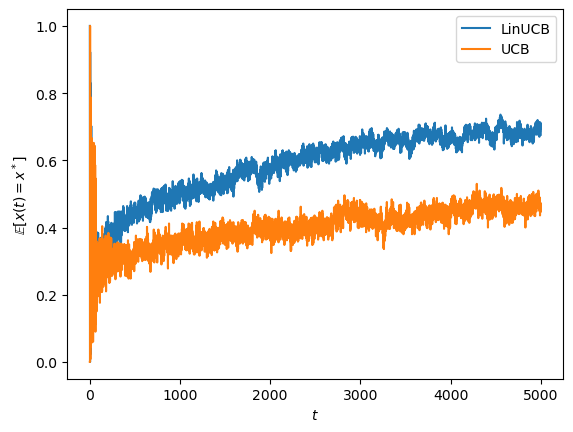

In [50]:
acc = np.mean(selected_arms==Env.opt(), axis=0)
plt.plot(acc[0], label='LinUCB')
plt.plot(acc[1], label='UCB')
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show() 

<br>

## 06.05. 베이즈 로지스틱 회귀
- 로지스틱 회귀에서는 각 솔루션 $x$의 보상 기댓값 $\theta_x$에 대해 

$$\theta_x = logistic(\phi(x)^T w)$$

- **보상 $r$은 기댓값 파라미터 $\theta_x$를 가진 베르누이 분포로부터 생성된다고 가정**
    
    $\rightarrow$ 가능도 함수 $p(r|\theta_x)$는
    
$$p(r|\theta_x) = Bernoulli(\theta_x) = \theta^r_x (1-\theta_x)^{1-r} = (logistic(\phi(x)^T w))^r (1- logistic(\phi(x)^T w))^{1-r}$$
$$= (\frac{1}{1 + exp(-\phi(x)^T w)})^r (\frac{exp(-\phi(x)^T w)}{1 + exp(-\phi(x)^T w)})^{1-r}$$
$$= (\frac{exp(\phi(x)^T w)}{1 + exp(\phi(x)^T w)})^r (\frac{1}{1 + exp(\phi(x)^T w)})^{1-r}$$
$$= \frac{(exp(\phi(x)^T w))^r}{exp(\phi(x)^T w)+1}$$

- **파라미터 $w$의 사전분포 $p(w)$는 다차원 정규분포를 설정**
    - 평균은 영벡터 ($\mu_0 = 0$), 분산은 단위행렬의 정수배로 가정 ($\Sigma_0 = \sigma^2_0 I$)
    
$$p(w) = N(\mu_0, \Sigma_0) \\ = N(0, \sigma^2_0 I) \\ = \frac{1}{(\sqrt{2\pi})^m \sigma_0} exp(- \frac{w^T w}{2\sigma^2_0})$$

- 베이즈 갱신을 통한 $w$의 사후분포는
    
    ($D$는 $T$시점까지 선택한 솔루션과 얻어진 보상의 이력 $\{(x_1, r_1), \dots (x_T, r_T)\}$
    
$$p(w|D) \approx p(w)p(D|w) \\ \approx \frac{1}{(\sqrt{2\pi})^m \sigma_0} exp(-\frac{w^T w}{2\sigma^2_0}) \Pi^T_{t=1} \frac{(exp(\phi(x_t)^T w))^{r_t}}{exp(\phi(x_t)^T)w} + 1$$

- **톰슨 샘플링에 로지스틱 회귀모델을 응용하기 위해서는 이 사후분포로부터 파라미터를 샘플링**

    $\rightarrow$ **정규분포 등의 잘 알려진 분포에 의해 사후분포를 근사**
    
    $\rightarrow$ **확률분포의 근사를 생각한다면, 확률밀도가 높은 곳에서 근사를 한 쪽이 원래 확률분포의 특성을 잘 나타냄**
    
    $\rightarrow$ **최빈값을 중심으로 하고 있는 확률분포를 정하여, 정규분포를 이용해 근사하는 것 $\rightarrow$ 라플라스 근사 (Laplace Approximation)**
    
    

- **라플라스 근사를 통하여, 사후분포를 정규분포에 근사하면 파라미터의 샘플이 단순해지므로, 톰슨 샘플링에 응용이 가능**

<br>

#### 라플라스 근사 (Laplace Approximation)

*(라플라스 근사 예시 이미지)*
- *최빈값에서 사후분포와 확률분포가 일치하도록 조정한 라플라스 근사*

<img src='https://bookdown.org/rdpeng/advstatcomp/integration_files/figure-html/unnamed-chunk-9-1.png' width='500'>

<br>

- **라플라스 근사를 위하여, 사후분포가 극대가 되는 위치를 탐색**
    
    $\rightarrow$ **계산의 용이성을 위하여 $-log(\text{사후분포})$가 극소가 되는 점을 탐색**
    
$$-log(p(w|D)) \approx - log(\frac{1}{(\sqrt{2\pi})^m \sigma_0}) + \frac{w^Tw}{2\sigma^2_0} \\ = -\Sigma^T_{t=1} (r_t \phi(x_t)^T w) + \Sigma^T_{t=1} log(exp(\phi(x_t)^T w)+1)$$

<br>

- **함수의 기울기가 0이 되는 점을 탐색하기 위해 $-log(p(w|D))$의 도함수 도출**

$$g(w) = -\triangledown_w log(p(w|D)) \\ = \frac{w}{\sigma^2_0} \Sigma^T_{t=1} r_1 \phi(x_t) + \Sigma^T_{t=1} \frac{\phi(x_t)exp(\phi(x_t)^T w)}{exp(\phi(x_t)^T w)+1} \\ = \frac{w}{\sigma^2_0} + \Sigma^T_{t=1} \phi(x_t) (logistic(\phi(x_t)^T w) - r_t)$$

<br>

- **도함수 $g(w)=0$이 되는 점 $\hat{w}$를 탐색**
    
    - **기울기가 0에 가까운 값이 될 때까지, 기울기와 반대부호의 작은 값을 더해나감 $\rightarrow$ 경사하강법 (Gradient Descent)**
    
    - **기울기의 2차 도함수를 이용한 뉴턴법 (Newton's method)**
    
<br>

- **뉴턴법은 아래의 식으로 업데이트를 반복하여 $f(x) = 0$을 만족하는 점 $x$의 근사 솔루션을 얻는 방법**

$$x_{s+1} = x_s - \frac{f(x_s)}{f'(x_s)}$$

- **목점함수 $y= f(x)$에 대해 어떤 점 $x_s$에서 접하는 접선과 $x$축이 교차하는 점을 $x_{s+1}$라고 할 때,**
    
    **접점 $(x_s, f(x_s))$와 $x$축 상의 두 점 ($x_s, 0$), ($x_{s+1}, 0$)으로 만들어지는 삼각형에 주목하면 다음 관계가 성립**
    
$$f'(x_s) \times (x_s - x_{s+1}) = f(s)$$

<img src='https://velog.velcdn.com/images/openjr/post/4b803897-b108-430a-8e70-b7bd5c49a3dc/image.png' width='500'>

- **기울기 벡터의 미분 $\triangledown_w g(w)$에 대해 적용하면 헤세 행렬 (Hessian Matrix)가 도출**

$$H(w) = \triangledown_w g(w) \\ = \frac{I}{\sigma^2_0} + \Sigma^T_{t=1} \phi(x_t)\phi(x_t)^T logistic(\phi(x_t)^T w) (1- logistic(\phi(x_t)^T w))$$

- **이 결과를 뉴턴법에 대입한, $w$ 파라미터 사후분포의 음의대수 최솟값의 근사값 $\hat{w}$를 도출하는 업데이트 식**

$$w_{s+1} = w_s - H^{-1} (w_s) g(w_s)$$

- **$\hat{w}$를 구한 이후, 사후분포를 라플라스 근사를 이용하여 정규분포로 근사**
    - 사후분포 음의 대수는 극솟값 $\hat{w}$ 주변에서 다음과 같이 근사
    
$$-log(p(w|D)) = f(\hat{w}) + (w-\hat{w})^T g(\hat{w}) + \frac{1}{2} (w-\hat{w})^T H(\hat{w}) (w-\hat{w}) + \dots \\ \simeq \frac{1}{2}(w- \hat{w})^T H(\hat{w})(w-\hat{w}) + (상수)$$ $\rightarrow$ **임의의 관계를 어떤 점 주변의 도함수로 만들어진 항들의 합으로 나타냄 $\rightarrow$ 테일러 급수 (Taylor Series)**

- 이 합은 무한히 계속되지만, 3차항 이후는 무시할 수 있을 정도로 작기 때문에, 통상 2차항까지만 계산
    
    여기에서 1차항은 $g(\hat{w})=0$이며, $w$를 포함하지 않는 항은 상수로 가정
    
- 지수함수를 적용하여, $log$를 제거하면

$$p(w|D) \simeq (상수) \;exp(-\frac{1}{2}(w-\hat{w})^T H(\hat{w})(w-\hat{w})) = N(\hat{w}, H^{-1} (w))$$ $\rightarrow$ 로지스틱 회귀에 대한 파라미터 $w$의 사후분포를 정규분포로 근사

<br>

### 로지스틱 회귀 톰슨 샘플링 구현
- 지수함수에 1,000 이상의 큰 값을 전달하면, 오버플로우가 발생하므로 입력이 -500보다 작을 때는 0으로 반환하도록 보완

In [1]:
arms = [[0, 0], [0, 1], [1, 0], [1, 1]] # 선택지
logistic = lambda x: 0 if x < -500 else 1 / (1 + np.exp(-x)) # 로지스틱 함수

<br>

#### 환경 구현

In [2]:
class Env(object):
    
    def p(arm):
        p = logistic(arm[0] * 0.2 + arm[1] * 0.8 - 4)
        return p

    def react(arm):
        return 1 if np.random.random() < Env.p(arm) else 0

    def opt():
        return np.argmax([Env.p(arm) for arm in arms])

<br>

#### 에이전트 구현
- `self.phis` : $\phi(x) = (1, x_1, x_2)^T$
- `self.selected_arms` : 선택한 솔루션의 이력
- `self.rewards` : 관측한 보상의 이력
- `self.sigma` : $w$ 사전분포 분산
- `self.hatw` : 사후 최대 확률을 부여하는 파라미터의 추정량 $\hat{w}$
- `self.invH` : 헤세 행렬의 역행렬 $H^{-1}(s)$

<br>

- `self.get_arm` : 파라미터 $w$의 사후분포 $N(\hat{w}, H^{-1}(w))$로부터 샘플을 생성하고, 추정 기댓값 $\theta_w = logistic(w^T \phi(x))$를 최대로 하는 솔루션 $x$의 인덱스를 반환
    - logistic은 증가함수이므로, $logistic(w^T \phi(x))$가 최대로 하는 솔루션을 선택하는 것과 $w^T \phi(x)$가 최대가 되는 솔루션을 선택하는 것은 동일
    
- `self.update` : $w$의 샘플 생성에 필요한 값 `self.hatw`와 `self.invH`를 업데이트
    - 뉴턴법을 이용한 업데이트 구현
    - 업데이트의 차가 0.0001보다 작거나 10회 업데이트했을 때, 뉴턴법에 따른 업데이트를 중지

- `self.get_g` : 기울기 벡터 $b(w)$를 계산
- `self.get_invH` : 헤세 행렬의 역행렬 $H^{-1}(w)$를 계산

In [9]:
class LogisticRegressionTSAgent(object):
    def __init__(self):
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T
        self.sigma = 1 
        self.hatw = np.zeros((self.phis.shape[0], 1)) 
        self.invH = None
        self.selected_arms = []
        self.rewards = []
    
    # w의 사후분포로부터 샘플을 생성
    def get_arm(self):
        if (len(self.selected_arms) % 100 == 0): self.update()
        w = np.random.multivariate_normal(self.hatw[:, 0], self.invH)
        est = self.phis.T.dot(w)
        return np.argmax(est) # 추정 기댓값을 최대로 하는 솔루션 인덱스를 반환

    def update(self):
        for i in range(10):
            g = self.get_g()
            self.invH = self.get_invH()
            diff = self.invH.dot(g)
            self.hatw = self.hatw - diff
            if (np.linalg.norm(diff) < 0.0001): break

    def get_g(self):
        g = self.hatw / (self.sigma ** 2)
        for t, arm in enumerate(self.selected_arms):
            phi = self.phis[:, [arm]]
            g += phi * (logistic(phi.T.dot(self.hatw)) - self.rewards[t])
        return g

    def get_invH(self):
        H = np.identity(self.phis.shape[0]) / (self.sigma ** 2)
        for arm in self.selected_arms:
            phi = self.phis[:, [arm]]
            lpw = logistic(phi.T.dot(self.hatw))
            H += phi.dot(phi.T) * lpw * (1 - lpw)
        invH = np.linalg.inv(H)
        return invH

    def sample(self, arm_index, reward):
        self.selected_arms.append(arm_index)
        self.rewards.append(reward)

In [10]:
from joblib import Parallel, delayed

In [11]:
n_step = 5000

In [12]:
def sim(Agent):
    agent = Agent()
    selected_arms = []
    earned_rewards = []
    for step in range(n_step):
        arm_index = agent.get_arm()
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms.append(arm_index)
        earned_rewards.append(reward)
    return (selected_arms, earned_rewards)

<br>

#### 베르누이 분포 상의 톰슨 샘플링 에이전트와의 비교

In [14]:
class BernoulliTSAgent(object):

    def __init__(self):
        self.counts = [0 for _ in range(n_arms)] 
        self.wins = [0 for _ in range(n_arms)]
    
    # 각 선택지별 베타사후분포 게산하여 난수생성후, 생성한 값이 최대가 되는 선택지를 반환
    def get_arm(self):
        beta = lambda N, a: np.random.beta(a + 1, N - a + 1)
        result = [beta(self.counts[i], self.wins[i]) for i in range(n_arms)] 
        arm = result.index(max(result))
        return arm

    def sample(self, arm, reward): 
        self.counts[arm] = self.counts[arm] + 1 
        self.wins[arm] = self.wins[arm] + reward

In [ ]:
n_arms = len(arms)
n_iter = 500
results = Parallel(n_jobs=-1)([delayed(sim)(LogisticRegressionTSAgent) for _ in range(n_iter)])
selected_arms_lr = np.array([i[0] for i in results])
earned_rewards_lr = np.array([i[1] for i in results])
results = Parallel(n_jobs=-1)([delayed(sim)(BernoulliTSAgent) for _ in range(n_iter)])
selected_arms_ber = np.array([i[0] for i in results])
earned_rewards_ber = np.array([i[1] for i in results])

- 정답률 추이에 따르면, 예산을 모두 이용한 시점에서는 같은 정도의 정답률에 도달했지만,
    
    로지스틱 회귀 모델 상의 톰슨 샘플링 쪽이 성능이 좋지 않음


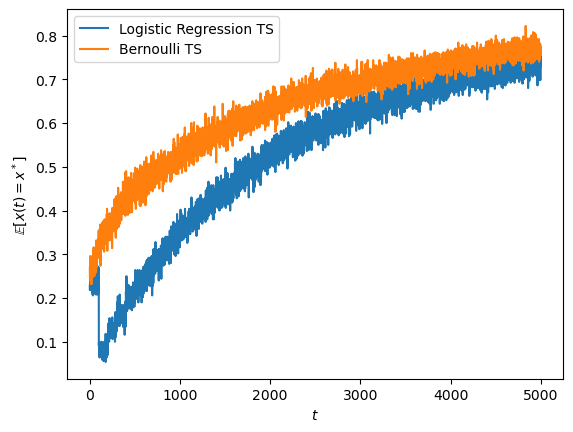

In [18]:
plt.plot(np.mean(selected_arms_lr==Env.opt(), axis=0),
         label='Logistic Regression TS')
plt.plot(np.mean(selected_arms_ber==Env.opt(), axis=0),
         label='Bernoulli TS')
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}[x(t) = x^*]$')
plt.legend()
plt.show()

- 누적 보상 이력에서도, 로지스틱 회귀모델 상의 톰슨 샘플링 쪽이 다소 좋지 않음

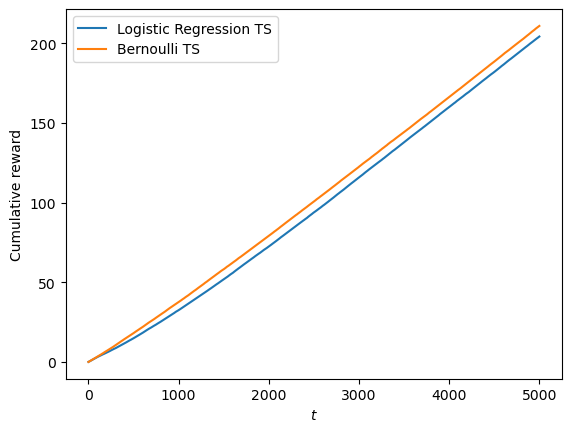

In [19]:
plt.plot(np.mean(np.cumsum(earned_rewards_lr, axis=1), axis=0),
         label='Logistic Regression TS')
plt.plot(np.mean(np.cumsum(earned_rewards_ber, axis=1), axis=0),
         label='Bernoulli TS')
plt.xlabel(r'$t$')
plt.ylabel('Cumulative reward')
plt.legend()
plt.show() 

- **솔루션을 구성하는 변수가 하나 증가했을 때**
    
    **(0 또는 1이라는 2개 값을 가지는 새로운 이진변수 $x_3 \in \{0, 1\}$을 고려 $\rightarrow$     $x = (x_1, x_2, x_3)^T$)**
    
    **이 조건에서 환경이 $\theta = logistic(0.2 x_1 + 0.8 x_2 - 0.5x_3 - 4)$인 기댓값을 기반으로 에이전트에 보상을 주는 문제를 고려한다면**
    
    $\rightarrow$ **로지스틱 회귀상의 톰슨 샘플링을 이용할 때, 솔루션의 특징량을 고려하지 않는 톰슨 샘플링보다 빠르게 보상을 최대화**
    
    $\rightarrow$ **솔루션이 보다 많은 변수로 구성된 경우에는, 각각의 솔루션을 모두 독립한 것으로 보는 것이 아니라, 그 특징량으로 보는 것의 장점이 커짐**

<br>

### 개인화에서의 응용
- **컨텍스트 기반 슬롯머신 문제의 정식화를 돌아보면, 일반적으로 선택지 $X(t)$가 시점 $t$마다 변화함을 가정**
    
    $\rightarrow$ **웹 최적화의 문맥에서 각 시점은 사용자의 방문에 해당하며, 결과적으로 사용자가 방문할 때마다 선택지가 달라져도 문제가 없음을 의미**
    
    $\rightarrow$ **디자인안의 특징과 방문 사용자의 특징을 조합한 것을 어떤 시점에서 선택지 $X(t)$로 본다면, 사용자의 특징별로 제시하는 디자인안을 바꾸는 것, 개인화를 구현 가능**

<br>

#### 개인화 사례
- 0 (제품 이미지) 혹은 1 (샘플 이미지)를 가지는 변수 $x_{이미지}$를 이용하면 디자인안 $x$를 다음과 같이 표현

$$x = (x_{이미지})$$

- 어떤 시점 $t$에 방문한 사용자 $u_t$가 모바일 기기 이용 여부라는 특징에 나타난 것이라고 가정 $\rightarrow$ 이진변수 $u_{모바일, t}$

$$u_t = (u_{모바일, t})$$

- 시점 $t$에서의 사용자의 특징 $u_t$를 디자인안 $x$에 붙여서 특성 $\phi_t$를 설계
    
    (각 요소를 더하기만 한 것이 아니라 $x_{이미지}$와 $u_{모바일, t}$를 곱한 교호 작용항 $x_{이미지}\;u_{모바일,t}$도 포함)
    
$$\phi_t = \begin{pmatrix} x_{이미지} \\ u_{모바일,t} \\ x_{이미지}\;u_{모바일,t} \\ 1 \end{pmatrix}$$

<br>

- 시점 $t$에서 클릭률 $\theta_t$는 선형모델을 이용하면

$$\theta_t = w^T \phi_t = (w_1, w_2, w_3, w_4) \begin{pmatrix} x_{이미지} \\ u_{모바일,t} \\ x_{이미지}\;u_{모바일,t} \\ 1 \end{pmatrix}$$


- 웹페이지를 데스크톱에서 표시하는 경우 ($u_{모바일, t}=0$)에는, 샘플 이미지를 보여주는 ($x_{이미지}=1$) 것이 더 좋으며,

    모바일 단말에서 표시하는 경우 ($u_{모바일,t}=1$)에는 제품 이미지를 보여주는 편이 좋다 ($x_{이미지}=0$)라고 가정한다면,

    $\rightarrow$ 사용자의 특성 $u_{모바일,t}$에 따라 최적의 히어로 이미지 $x_{이미지}$가 변화하는 교호작용이 존재
    
    $\rightarrow$ 이 모델은 $w_1 >0$, $w_3 < 0$이 되는 파라미터를 학습
    
    $\rightarrow$ 사용자가 이용하는 기기에 따라 히어로 이미지를 나누어 표시함으로써 보다 많은 보상을 얻을 수 있음

<br>

- 만약 사용자가 데스크톱을 이용하는 경우, 시점 $t$에서 제시할 수 있는 선택지 $X(t)$는

$$X(t) = \begin{bmatrix} {\begin{pmatrix} 0\\0\\0\\1\end{pmatrix}}, {\begin{pmatrix} 1\\0\\0\\1\end{pmatrix}}\end{bmatrix}$$ $\rightarrow$ 클릭률 $\theta_t$는 각각 $w_4$, $w_1 + w_4$가 되므로, $w_1 >0$이라고 학습했다면, 후자인 샘플 이미지 ($x_{이미지}=1$)쪽이 더 좋다고 추론

<br>

- 만약 사용자가 모바일을 이용하는 경우, 시점 $t$에서 제시할 수 있는 선택지 $X(t)$는

$$X(t) = \begin{bmatrix} {\begin{pmatrix} 0\\1\\0\\1\end{pmatrix}}, {\begin{pmatrix} 1\\1\\1\\1\end{pmatrix}}\end{bmatrix}$$ $\rightarrow$ 클릭률 $\theta_t$는 각각 $w_2+w_4$, $w_1 +w_2+ w_3+w_4$가 되므로, 음의 교호작용이 커서 $w_1 + w_3 <0$이 되면, 전자인 제품 이미지 ($x_{이미지}=0$)쪽이 더 좋다고 추론

<br>

- **결과적으로 $w_3 x_{이미지}x_{모바일,t}$과 같이 디자인안과 사용자의 특징 사이에 어떤 큰 교호작용이 있다면 사용자의 특징 $u_{모바일,t}$에 맞춰 제시할 디자인안을 나누어 표시하는 개인화를 구현 가능**